## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import os
import urllib
import csv
import glob
import numpy as np
import matplotlib.patches as mpatches



#read combined dataframe
tv_movies_df = pd.read_csv("..\Final_Datasets\MergedTVandMovies.csv", dtype='unicode', encoding='utf8' )    
tv_movies_df.head()


#combine_df
tv_movies_df.head()
tv_movies_df1 =tv_movies_df.drop('Unnamed: 0',axis=1)
tv_movies_df1.head()

#age_sets = tv_movies_df1["Age"].unique()
#age_sets
#age_sets2 = ['all', '7+', '13+', '16+', '18+']
#print(age_sets2)
tv_movies_df1.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,movies,shows
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148,Movie,NaN
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136,Movie,NaN
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149,Movie,NaN
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116,Movie,NaN
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161,Movie,NaN


In [3]:
#create movie dataframe by only getting movies and getting on IMDb scores>0
tv_movies_df1["IMDb"] = tv_movies_df1["IMDb"].astype(float)

test_df = tv_movies_df1.loc[(tv_movies_df1["movies"] =="Movie") &
                            (tv_movies_df1["IMDb"] >=0)  ] 
                             
                #(tv_movies_df1["IMDb"] !="NaN")]
                                      
                                     
htest_df = tv_movies_df1.loc[(tv_movies_df1["movies"] =="Movie") &
                            (tv_movies_df1["IMDb"] >=8)  ] 
                
                             

htest_df.describe
test_df.describe

<bound method NDFrame.describe of                                 Title  Year  Age  IMDb Rotten Tomatoes  \
0                           Inception  2010  13+   8.8             87%   
1                          The Matrix  1999  18+   8.7             87%   
2              Avengers: Infinity War  2018  13+   8.5             84%   
3                  Back to the Future  1985   7+   8.5             96%   
4      The Good, the Bad and the Ugly  1966  18+   8.8             97%   
...                               ...   ...  ...   ...             ...   
16738    Whispers: An Elephant's Tale  2000  all   5.0             NaN   
16739       The Ghosts of Buxley Hall  1980  NaN   6.2             NaN   
16740                  The Poof Point  2001   7+   4.7             NaN   
16741           Sharks of Lost Island  2013  NaN   5.7             NaN   
16742              Man Among Cheetahs  2017  NaN   6.6             NaN   

      Netflix Hulu Prime Video Disney+ Type                       Directors  

In [4]:
#create tv dataframe by only getting TV and getting on IMDb scores>0
tv_movies_df1["IMDb"] = tv_movies_df1["IMDb"].astype(float)

tvtest_df = tv_movies_df1.loc[(tv_movies_df1["shows"] =="TV") &
                            (tv_movies_df1["IMDb"] >=0)  ] 
                             
                #(tv_movies_df1["IMDb"] !="NaN")]
                                      
                                     
htvtest_df = tv_movies_df1.loc[(tv_movies_df1["shows"] =="TV") &
                            (tv_movies_df1["IMDb"] >=8)  ] 
                
                             

htvtest_df.describe
tvtest_df.describe

<bound method NDFrame.describe of                                                 Title  Year  Age  IMDb  \
16744                                    Breaking Bad  2008  18+   9.5   
16745                                 Stranger Things  2016  16+   8.8   
16746                                     Money Heist  2017  18+   8.4   
16747                                        Sherlock  2010  16+   9.1   
16748                                Better Call Saul  2015  18+   8.7   
...                                               ...   ...  ...   ...   
22342  Billy Dilley's Super-Duper Subterranean Summer  2017   7+   4.6   
22343                    Rocky Mountain Animal Rescue  2018  NaN   7.8   
22344                               Prairie Dog Manor  2019  NaN   8.6   
22345              Disney Junior Music Nursery Rhymes  2017  all   6.6   
22346                Bug Juice: My Adventures at Camp  2018  NaN   7.2   

      Rotten Tomatoes Netflix Hulu Prime Video Disney+ Type Directors Genres 

In [5]:
#movies
#create individual df per platform
test2_df = test_df.loc[(test_df["Netflix"] == "1")]
test3_df = test_df.loc[(test_df["Hulu"] == "1")]
test4_df = test_df.loc[(test_df["Prime Video"] == "1")]
test5_df = test_df.loc[(test_df["Disney+"] == "1")]


#create individual df per platform
htest2_df = htest_df.loc[(htest_df["Netflix"] == "1")]
htest3_df = htest_df.loc[(htest_df["Hulu"] == "1")]
htest4_df = htest_df.loc[(htest_df["Prime Video"] == "1")]
htest5_df = htest_df.loc[(htest_df["Disney+"] == "1")]
print(test2_df)
print(htest2_df)


                                                  Title  Year  Age  IMDb  \
0                                             Inception  2010  13+   8.8   
1                                            The Matrix  1999  18+   8.7   
2                                Avengers: Infinity War  2018  13+   8.5   
3                                    Back to the Future  1985   7+   8.5   
4                        The Good, the Bad and the Ugly  1966  18+   8.8   
...                                                 ...   ...  ...   ...   
3459                                   It's Okay, Buddy  2017  NaN   3.1   
3460                                  Behind 'The Cove'  2015  NaN   3.7   
3461  Edmilson Filho: Notas, Comedy about Relationships  2018  NaN   5.8   
3462                                           Hattrick  2007   7+   4.2   
3468                                                EMI  2008  NaN   4.3   

     Rotten Tomatoes Netflix Hulu Prime Video Disney+ Type  \
0                87%     

In [6]:
#tv
#create individual df per platform
tvtest2_df = tvtest_df.loc[(tvtest_df["Netflix"] == "1")]
tvtest3_df = tvtest_df.loc[(tvtest_df["Hulu"] == "1")]
tvtest4_df = tvtest_df.loc[(tvtest_df["Prime Video"] == "1")]
tvtest5_df = tvtest_df.loc[(tvtest_df["Disney+"] == "1")]


#create individual df per platform
htvtest2_df = htvtest_df.loc[(htvtest_df["Netflix"] == "1")]
htvtest3_df = htvtest_df.loc[(htvtest_df["Hulu"] == "1")]
htvtest4_df = htvtest_df.loc[(htvtest_df["Prime Video"] == "1")]
htvtest5_df = htvtest_df.loc[(htvtest_df["Disney+"] == "1")]
print(tvtest2_df)
print(htvtest2_df)


                        Title  Year  Age  IMDb Rotten Tomatoes Netflix Hulu  \
16744            Breaking Bad  2008  18+   9.5             96%       1    0   
16745         Stranger Things  2016  16+   8.8             93%       1    0   
16746             Money Heist  2017  18+   8.4             91%       1    0   
16747                Sherlock  2010  16+   9.1             78%       1    0   
16748        Better Call Saul  2015  18+   8.7             97%       1    0   
...                       ...   ...  ...   ...             ...     ...  ...   
18592  The Jaime Maussan Show  2010  NaN   4.9             NaN       1    0   
18595              HooplaKidz  2010  NaN   6.9             NaN       1    0   
18601        Trawlermen Tales  2016  NaN   6.1             NaN       1    0   
18610      ViR: The Robot Boy  2013  NaN   2.8             NaN       1    0   
18616             For the Win  2017  NaN   3.0             NaN       1    0   

      Prime Video Disney+ Type Directors Genres Cou

In [7]:
#movie
#
s2 = test2_df.groupby("Age")["Netflix"].count().to_frame(name = "nf-age").reset_index()
s3 = test3_df.groupby("Age")["Hulu"].count().to_frame(name = "hu-age").reset_index()
s4 = test4_df.groupby("Age")["Prime Video"].count().to_frame(name = "pv-age").reset_index()
s5 = test5_df.groupby("Age")["Disney+"].count().to_frame(name = "di-age").reset_index()

s2.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
s3.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
s4.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
s5.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)

s2.sort_values(by = "Age", inplace = True)
s3.sort_values(by = "Age", inplace = True)
s4.sort_values(by = "Age", inplace = True)
s5.sort_values(by = "Age", inplace = True)

print(s2)
print(s3)
print(s4)
print(s5)





hs2 = htest2_df.groupby("Age")["Netflix"].count().to_frame(name = "hnf-age").reset_index()
hs3 = htest3_df.groupby("Age")["Hulu"].count().to_frame(name = "hhu-age").reset_index()
hs4 = htest4_df.groupby("Age")["Prime Video"].count().to_frame(name = "hpv-age").reset_index()
hs5 = htest5_df.groupby("Age")["Disney+"].count().to_frame(name = "hdi-age").reset_index()

hs2.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
hs3.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
hs4.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
hs5.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)

hs2.sort_values(by = "Age", inplace = True)
hs3.sort_values(by = "Age", inplace = True)
hs4.sort_values(by = "Age", inplace = True)
hs5.sort_values(by = "Age", inplace = True)

hs5 = hs5.append({"Age":16,"hdi-age":0},ignore_index=True)
hs5 = hs5.append({"Age":18,"hdi-age":0},ignore_index=True)
hs5["Age"] = hs5["Age"].astype(int)



print(hs2)
print(hs3)
print(hs4)
print(hs5)







ms2 = test2_df.groupby("Age")["IMDb"].mean().to_frame(name = "mnf-age").reset_index()
ms3 = test3_df.groupby("Age")["IMDb"].mean().to_frame(name = "mhu-age").reset_index()
ms4 = test4_df.groupby("Age")["IMDb"].mean().to_frame(name = "mpv-age").reset_index()
ms5 = test5_df.groupby("Age")["IMDb"].mean().to_frame(name = "mdi-age").reset_index()

ms2.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
ms3.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
ms4.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
ms5.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)

ms2.sort_values(by = "Age", inplace = True)
ms3.sort_values(by = "Age", inplace = True)
ms4.sort_values(by = "Age", inplace = True)
ms5.sort_values(by = "Age", inplace = True)

print(ms2)
print(ms3)
print(ms4)
print(ms5)




   Age  nf-age
4    3     130
3    7     321
0   13     381
1   16      89
2   18     752
   Age  hu-age
4    3      52
3    7     109
0   13     118
1   16      17
2   18     289
   Age  pv-age
4    3     398
3    7     912
0   13     808
1   16     225
2   18    2607
   Age  di-age
4    3     277
3    7     179
0   13      40
1   16       1
2   18       3
   Age  hnf-age
4    3        9
3    7       19
0   13       18
1   16        2
2   18       37
   Age  hhu-age
4    3        2
3    7        5
0   13        8
1   16        1
2   18       10
   Age  hpv-age
4    3       24
3    7       33
0   13       34
1   16        6
2   18       32
   Age  hdi-age
0    3       14
1    7       12
2   13        6
3   16        0
4   18        0
   Age   mnf-age
4    3  6.276923
3    7  6.203738
0   13  6.345669
1   16  6.323596
2   18  6.289628
   Age   mhu-age
4    3  5.909615
3    7  6.285321
0   13  6.430508
1   16  5.411765
2   18  6.176125
   Age   mpv-age
4    3  6.073367
3    7  5.948684
0

In [8]:
#tv
#
tvs2 = tvtest2_df.groupby("Age")["Netflix"].count().to_frame(name = "tvnf-age").reset_index()
tvs3 = tvtest3_df.groupby("Age")["Hulu"].count().to_frame(name = "tvhu-age").reset_index()
tvs4 = tvtest4_df.groupby("Age")["Prime Video"].count().to_frame(name = "tvpv-age").reset_index()
tvs5 = tvtest5_df.groupby("Age")["Disney+"].count().to_frame(name = "tvdi-age").reset_index()

tvs2.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
tvs3.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
tvs4.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
tvs5.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)



tvs3 = tvs3.append({"Age":13,"tvhu-age":0},ignore_index=True)
tvs3["Age"] = tvs3["Age"].astype(int)

tvs5 = tvs5.append({"Age":13,"tvdi-age":0},ignore_index=True)
tvs5 = tvs5.append({"Age":18,"tvdi-age":0},ignore_index=True)
tvs5["Age"] = tvs5["Age"].astype(int)


tvs2.sort_values(by = "Age", inplace = True)
tvs3.sort_values(by = "Age", inplace = True)
tvs4.sort_values(by = "Age", inplace = True)
tvs5.sort_values(by = "Age", inplace = True)



#htvs5 = hs5.append({"Age":18,"hdi-age":0},ignore_index=True)
#htvs5["Age"] = hs5["Age"].astype(int)




print(tvs2)
print(tvs3)
print(tvs4)
print(tvs5)





htvs2 = htvtest2_df.groupby("Age")["Netflix"].count().to_frame(name = "htvnf-age").reset_index()
htvs3 = htvtest3_df.groupby("Age")["Hulu"].count().to_frame(name = "htvhu-age").reset_index()
htvs4 = htvtest4_df.groupby("Age")["Prime Video"].count().to_frame(name = "htvpv-age").reset_index()
htvs5 = htvtest5_df.groupby("Age")["Disney+"].count().to_frame(name = "htvdi-age").reset_index()

htvs2.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
htvs3.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
htvs4.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
htvs5.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)

htvs2 = htvs2.append({"Age":13,"htvnf-age":0},ignore_index=True)
htvs3 = htvs3.append({"Age":13,"htvhu-age":0},ignore_index=True)
htvs4 = htvs4.append({"Age":13,"htvpv-age":0},ignore_index=True)
htvs5 = htvs5.append({"Age":13,"htvdi-age":0},ignore_index=True)



htvs2.sort_values(by = "Age", inplace = True)
htvs3.sort_values(by = "Age", inplace = True)
htvs4.sort_values(by = "Age", inplace = True)
htvs5.sort_values(by = "Age", inplace = True)



htvs5 = htvs5.append({"Age":16,"htvdi-age":0},ignore_index=True)
htvs5 = htvs5.append({"Age":18,"htvdi-age":0},ignore_index=True)




htvs2["Age"] = hs5["Age"].astype(int)
htvs3["Age"] = hs5["Age"].astype(int)
htvs4["Age"] = hs5["Age"].astype(int)
htvs5["Age"] = hs5["Age"].astype(int)



print(htvs2)
print(htvs3)
print(htvs4)
print(htvs5)







mtvs2 = test2_df.groupby("Age")["IMDb"].mean().to_frame(name = "mtvnf-age").reset_index()
mtvs3 = test3_df.groupby("Age")["IMDb"].mean().to_frame(name = "mtvhu-age").reset_index()
mtvs4 = test4_df.groupby("Age")["IMDb"].mean().to_frame(name = "mtvpv-age").reset_index()
mtvs5 = test5_df.groupby("Age")["IMDb"].mean().to_frame(name = "mtvdi-age").reset_index()

mtvs2.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
mtvs3.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
mtvs4.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
mtvs5.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)

mtvs2.sort_values(by = "Age", inplace = True)
mtvs3.sort_values(by = "Age", inplace = True)
mtvs4.sort_values(by = "Age", inplace = True)
mtvs5.sort_values(by = "Age", inplace = True)

print(mtvs2)
print(mtvs3)
print(mtvs4)
print(mtvs5)




   Age  tvnf-age
4    3       169
3    7       296
0   13         3
1   16       396
2   18       359
   Age  tvhu-age
3    3       156
2    7       364
4   13         0
0   16       511
1   18       238
   Age  tvpv-age
4    3       185
3    7       217
0   13         1
1   16       209
2   18       182
   Age  tvdi-age
2    3        80
1    7        66
3   13         0
0   16         3
4   18         0
   Age  htvnf-age
3   16         30
2   13         75
4   18          0
0    3        132
1    7        110
   Age  htvhu-age
3   16         24
2   13         79
4   18          0
0    3        112
1    7         78
   Age  htvpv-age
3   16         41
2   13         56
4   18          0
0    3         68
1    7         74
   Age  htvdi-age
0    3          7
1    7         21
2   13          0
3   16          0
4   18          0
   Age  mtvnf-age
4    3   6.276923
3    7   6.203738
0   13   6.345669
1   16   6.323596
2   18   6.289628
   Age  mtvhu-age
4    3   5.909615
3    7   6.28532

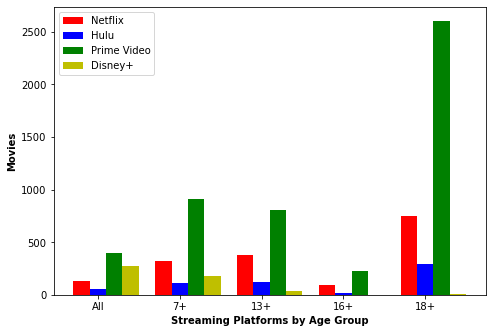

In [9]:
#movie count by age group


fig = plt.figure(figsize = (6,4))

import matplotlib.patches as mpatches

x = np.arange(5)

ax = fig.add_axes([0,0,1,1])
ax.bar(x, s2["nf-age"], color = 'r', width = 0.2, label = "Netflix")
ax.bar(x+.2, s3["hu-age"], color = 'b', width = 0.2, label = "Hulu")
ax.bar(x+ .4, s4["pv-age"], color = 'g', width = 0.2, label = "Prime Video")
ax.bar(x+.6, s5["di-age"], color = 'y', width = 0.2, label = "Disney+")


plt.xlabel('Streaming Platforms by Age Group', fontweight ='bold') 
plt.ylabel('Movies', fontweight ='bold')
#plt.xticks(['all', '7+', '13+', '16+', '18+']) 
plt.xticks([r + .2 for r in range(5)], 
           ['All', '7+', '13+', '16+', '18+']) 


plt.legend()

plt.savefig(r'../Final_Datasets/Age Group - Movies per Streaming Service.png', bbox_inches = 'tight')



plt.show()


#plt.savefig(r'../Final_Datasets/Age Group - Movies per Streaming Service.png',bbox_inches = 'tight')



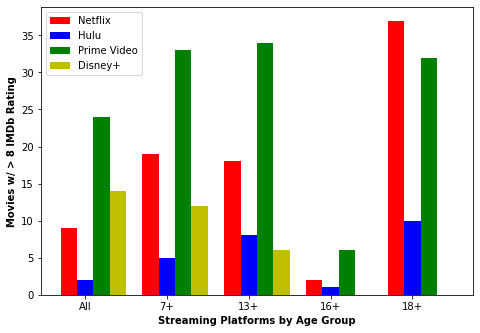

In [10]:
#movie count by age group - high IMDb scores

fig = plt.figure(figsize = (6,4))

x = np.arange(5)

ax = fig.add_axes([0,0,1,1])
ax.bar(x, hs2["hnf-age"], color = 'r', width = 0.2, label = "Netflix")
ax.bar(x+.2, hs3["hhu-age"], color = 'b', width = 0.2, label = "Hulu")
ax.bar(x+ .4, hs4["hpv-age"], color = 'g', width = 0.2, label = "Prime Video")
ax.bar(x+.6, hs5["hdi-age"], color = 'y', width = 0.2, label = "Disney+")

plt.xlabel('Streaming Platforms by Age Group', fontweight ='bold') 
plt.ylabel('Movies w/ > 8 IMDb Rating', fontweight ='bold') 
#plt.xticks(['all', '7+', '13+', '16+', '18+']) 
plt.xticks([r + .2 for r in range(5)], 
           ['All', '7+', '13+', '16+', '18+']) 

plt.legend()

plt.savefig(r'../Final_Datasets/Age Group - Movies per Streaming Service with high IMDb score.png', bbox_inches = 'tight')

plt.show()

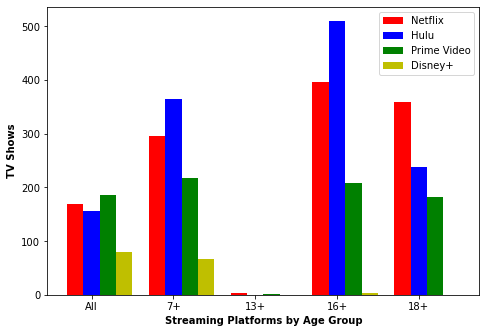

In [11]:
#tv show count by age group


fig = plt.figure(figsize = (6,4))

import matplotlib.patches as mpatches

x = np.arange(5)

ax = fig.add_axes([0,0,1,1])
ax.bar(x, tvs2["tvnf-age"], color = 'r', width = 0.2, label = "Netflix")
ax.bar(x+.2, tvs3["tvhu-age"], color = 'b', width = 0.2, label = "Hulu")
ax.bar(x+ .4, tvs4["tvpv-age"], color = 'g', width = 0.2, label = "Prime Video")
ax.bar(x+.6, tvs5["tvdi-age"], color = 'y', width = 0.2, label = "Disney+")


plt.xlabel('Streaming Platforms by Age Group', fontweight ='bold') 
plt.ylabel('TV Shows', fontweight ='bold')
#plt.xticks(['all', '7+', '13+', '16+', '18+']) 
plt.xticks([r + .2 for r in range(5)], 
           ['All', '7+', '13+', '16+', '18+']) 


plt.legend()

plt.savefig(r'../Final_Datasets/Age Group - TV Shows per Streaming Service.png', bbox_inches = 'tight')



plt.show()


#plt.savefig(r'../Final_Datasets/Age Group - Movies per Streaming Service.png',bbox_inches = 'tight')



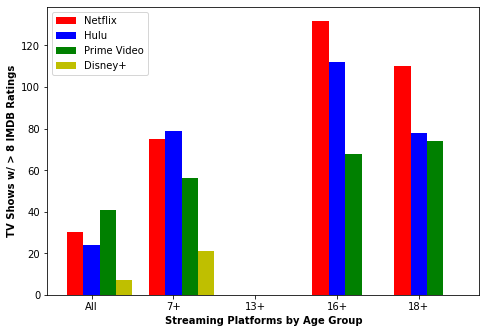

In [55]:
#tv show count by age group - high IMDb scores


fig = plt.figure(figsize = (6,4))

import matplotlib.patches as mpatches

x = np.arange(5)

ax = fig.add_axes([0,0,1,1])
ax.bar(x, htvs2["htvnf-age"], color = 'r', width = 0.2, label = "Netflix")
ax.bar(x+.2, htvs3["htvhu-age"], color = 'b', width = 0.2, label = "Hulu")
ax.bar(x+ .4, htvs4["htvpv-age"], color = 'g', width = 0.2, label = "Prime Video")
ax.bar(x+.6, htvs5["htvdi-age"], color = 'y', width = 0.2, label = "Disney+")


plt.xlabel('Streaming Platforms by Age Group', fontweight ='bold') 
plt.ylabel('TV Shows w/ > 8 IMDb Ratings', fontweight ='bold')
#plt.xticks(['all', '7+', '13+', '16+', '18+']) 
plt.xticks([r + .2 for r in range(5)], 
           ['All', '7+','13+', '16+', '18+']) 


plt.legend()

plt.savefig(r'../Final_Datasets/Age Group - TV Shows per Streaming Service with high IMDb score.png', bbox_inches = 'tight')



plt.show()


#plt.savefig(r'../Final_Datasets/Age Group - Movies per Streaming Service.png',bbox_inches = 'tight')



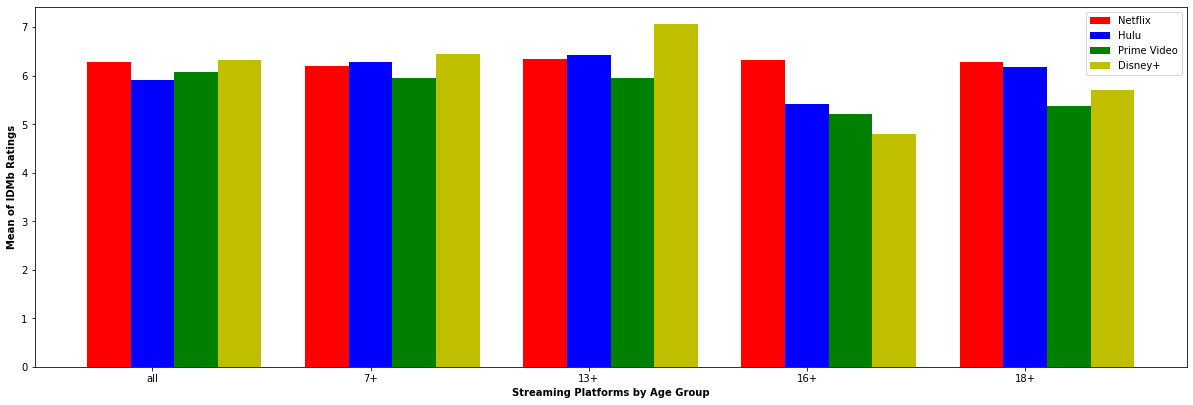

In [12]:
#IMDB mean for each age group  movies

fig = plt.figure(figsize = (16,5))

x = np.arange(5)

ax = fig.add_axes([0,0,1,1])
ax.bar(x, ms2["mnf-age"], color = 'r', width = 0.2, label = "Netflix")
ax.bar(x+.2, ms3["mhu-age"], color = 'b', width = 0.2, label = "Hulu")
ax.bar(x+ .4, ms4["mpv-age"], color = 'g', width = 0.2, label = "Prime Video")
ax.bar(x+.6, ms5["mdi-age"], color = 'y', width = 0.2, label = "Disney+")



plt.xlabel('Streaming Platforms by Age Group', fontweight ='bold') 
plt.ylabel('Mean of IDMb Ratings', fontweight ='bold') 
#plt.xticks(['all', '7+', '13+', '16+', '18+']) 
plt.xticks([r + .2 for r in range(5)], 
           ['all', '7+', '13+', '16+', '18+']) 

plt.legend()



                   
plt.show()

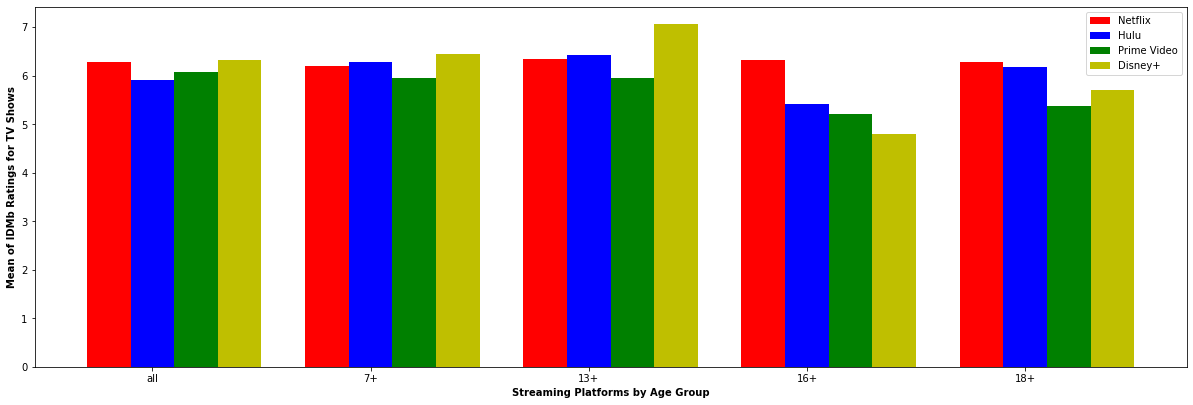

In [14]:
#IMDB mean for each age group tv 

fig = plt.figure(figsize = (16,5))

x = np.arange(5)

ax = fig.add_axes([0,0,1,1])
ax.bar(x, mtvs2["mtvnf-age"], color = 'r', width = 0.2, label = "Netflix")
ax.bar(x+.2, mtvs3["mtvhu-age"], color = 'b', width = 0.2, label = "Hulu")
ax.bar(x+ .4, mtvs4["mtvpv-age"], color = 'g', width = 0.2, label = "Prime Video")
ax.bar(x+.6, mtvs5["mtvdi-age"], color = 'y', width = 0.2, label = "Disney+")



plt.xlabel('Streaming Platforms by Age Group', fontweight ='bold') 
plt.ylabel('Mean of IDMb Ratings for TV Shows', fontweight ='bold') 
#plt.xticks(['all', '7+', '13+', '16+', '18+']) 
plt.xticks([r + .2 for r in range(5)], 
           ['all', '7+', '13+', '16+', '18+']) 

plt.legend()



                   
plt.show()

## Quartiles, Outliers and Boxplots

## Line and Scatter Plots

## Correlation and Regression